In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random

In [2]:
nr_squares = 80

In [3]:
# Creating the two main DataFrames

# The x and y columns are the corresponding x and y coordinates, a multi index is used
# Ped_ID is the unique ID of the ped standing on that square (If there is one on that square, otherwise it's 0)
# obstacle is a boolean that indicates if there's an obstacle on that square
squares = pd.DataFrame(columns = ['x', 'y', 'ped_ID', 'obstacle'])
x_list = nr_squares*[*range(0,nr_squares)]
y_list = []
for i in range(0, nr_squares):
    y_list.extend(nr_squares*[i])
squares['x'] = x_list
squares['y'] = y_list
squares_df = squares.set_index(['x', 'y'])
squares_df

,,ped_ID,obstacle
x,y,,
0,0,NaN,NaN
1,0,NaN,NaN
2,0,NaN,NaN
3,0,NaN,NaN
4,0,NaN,NaN
...,...,...,...
75,79,NaN,NaN
76,79,NaN,NaN
77,79,NaN,NaN


In [4]:
# ped_ID is an unique nr for each ped that enters the platform
# current_x and current_y are the unique cooordinates of the square the ped is standing on
# goal_x and y are the coordinates of the square the pedestrian wants to go to
ped = pd.DataFrame(columns = ['ped_ID', 'current_x', 'current_y', 'goal_x', 'goal_y'])
# Create 3 pedestrians
for p in range(0 ,6):
    a = {'ped_ID': p, 'current_x' : 0, 'current_y': 0, 'goal_x' : random.randint(0, nr_squares), 'goal_y': random.randint(0, 30)}
    ped = ped.append(a, ignore_index=True)
ped['diff_x'] = ped['goal_x'] - ped['current_x']
ped['diff_y'] = ped['goal_y'] - ped['current_y']
ped

,ped_ID,current_x,current_y,goal_x,goal_y,diff_x,diff_y
0,0,0,0,36,14,36,14
1,1,0,0,38,4,38,4
2,2,0,0,2,6,2,6
3,3,0,0,0,16,0,16
4,4,0,0,57,12,57,12
5,5,0,0,50,24,50,24


,ped_ID,current_x,current_y,goal_x,goal_y,diff_x,diff_y
0,0,0,0,36,14,36,14
1,1,0,0,38,4,38,4
2,2,0,0,2,6,2,6
3,3,0,0,0,16,0,16
4,4,0,0,57,12,57,12
5,5,0,0,50,24,50,24


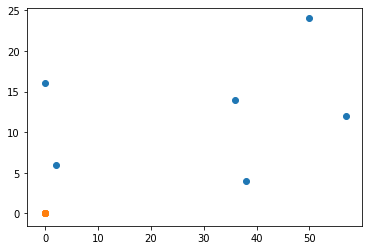

In [5]:
plt.scatter(ped['goal_x'], ped['goal_y'])
plt.scatter(ped['current_x'], ped['current_y']);
ped

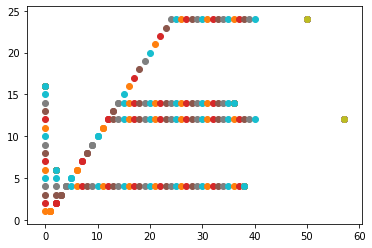

In [6]:
for t in range(0, 40):
    # Moving left and right
    right = ped['diff_x'] > 0
    left = ped['diff_x'] < 0
    ped['current_x'][right] = ped[right]['current_x'] + 1
    ped['current_x'][left] = ped[left]['current_x'] - 1
    ped['diff_x'] = ped['goal_x'] - ped['current_x']
    
    # Moving up and down
    up = ped['diff_y'] > 0
    down = ped['diff_y'] < 0
    ped['current_y'][up] = ped[up]['current_y'] + 1
    ped['current_y'][down] = ped[down]['current_y'] - 1
    ped['diff_y'] = ped['goal_y'] - ped['current_y']
    plt.scatter(ped['goal_x'], ped['goal_y'])
    plt.scatter(ped['current_x'], ped['current_y']);

In [7]:
ped

,ped_ID,current_x,current_y,goal_x,goal_y,diff_x,diff_y
0,0,36,14,36,14,0,0
1,1,38,4,38,4,0,0
2,2,2,6,2,6,0,0
3,3,0,16,0,16,0,0
4,4,40,12,57,12,17,0
5,5,40,24,50,24,10,0
